# Project 7 - Data Visualation of *Prosper's* loan data (Exploatory Visualisations)

## Introduction

Within this section of the project we are looking to produce visualisations that support in finding out more about the data.

In [138]:
#Load in Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [139]:
#First load in the CSV file
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [141]:
df.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [142]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Univariate Comparison plots

### Review of the variation of Credit grades
Within this first section we shall review the variation of Credit grades

In [143]:
#Nulls dropped initially
CG = df.CreditGrade.dropna()
CG = sorted(list(CG.unique()))
CG 

['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']

In [144]:
#Swap the positions of AA and A
def swapPositions(list, pos1, pos2): 
      
    list[pos1], list[pos2] = list[pos2], list[pos1] 
    return list
  
# Driver function 

swapPositions(CG, 0, 1)

['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

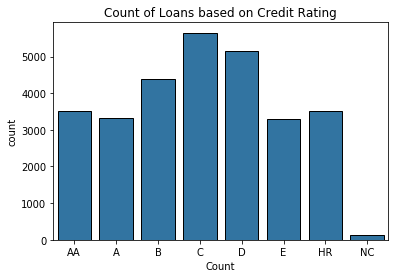

In [145]:
#produce bar plot to review the proportion of each Credit Grade
base_color = sb.color_palette()[0]
sb.countplot(data = df, x='CreditGrade', color = base_color, order = CG)
plt.xlabel('Credit Grade')
plt.xlabel('Count')
plt.title('Count of Loans based on Credit Rating');

> We can see the the credit grades are fairly normally distributed with the middle grade C being the most common. There are no huge extremes within this category other than NC. To visualise this in a different way we shall plot a donut chart.

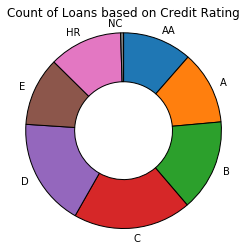

In [146]:
#Plot data as donut chart
sorted_counts = df['CreditGrade'].value_counts().sort_index()
plt.pie(sorted_counts, labels = CG, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');
plt.title('Count of Loans based on Credit Rating');

### Histogram to review the Estimated Loss
Within this section we'll plot a histogram to review the variation in estimated losses

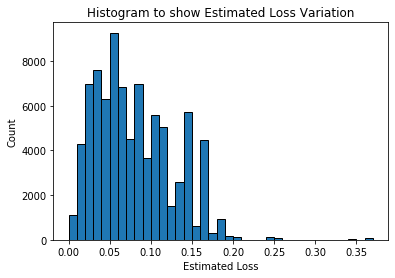

In [147]:
#Develop histogram to review the estimated loss
bin_edges = np.arange(0, df['EstimatedLoss'].max()+0.01, 0.01)
plt.hist(data = df, x = 'EstimatedLoss', bins = bin_edges);
plt.xlabel('Estimated Loss')
plt.ylabel('Count')
plt.title('Histogram to show Estimated Loss Variation');

> The above Histogram shows a left skewed distribution. The data shows that typically lossed are estimated to be <10%.

## Bivariate Comparison plots

## Correlation between Credit Grade and Estimated Return
In this section we shall expand on the previous analysis into Credit Grades by looking at the lenders expected returns based on Credit Grades. As we are plotting a categorical variable against a numerical variable we shall use a box plot for this.

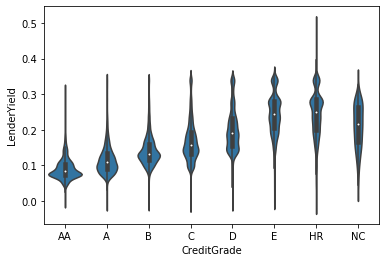

In [148]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'CreditGrade', y = 'LenderYield', color = base_color, order = CG)

### Correlation between the borrower rate and the lender yield
Within this section we'll use a scatterplot to see the correlation between the two aforementioned parameters

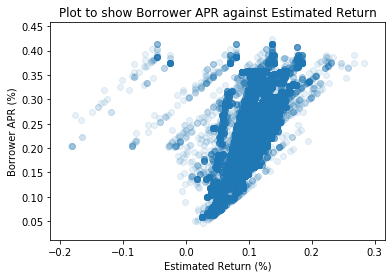

In [149]:
plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerAPR', alpha = 0.1);
plt.xlabel('Estimated Return (%)')
plt.ylabel('Borrower APR (%)');
plt.title('Plot to show Borrower APR against Estimated Return');

>The above plot shows that typically the lender expects to make around 10% on their loan. Eith the higher borrower APR there is a significantly higher range of estimated returs suggesting that these loans are more risky.

### Relationship between the Prosper Score and the Prosper Rating
Within this section we'll use a heat map to investigate the relationship between Prosper Score and the Prosper Rating

In [150]:
#Desribe variables to see how we shall size bins
df['ProsperRating (numeric)'].describe()

count    84853.000000
mean         4.072243
std          1.673227
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating (numeric), dtype: float64

In [151]:
df['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

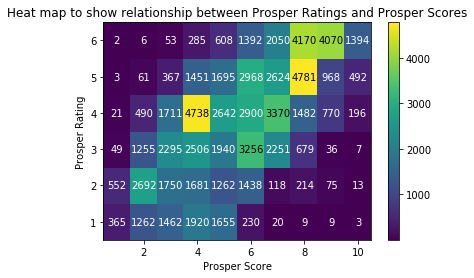

In [152]:
#Create heat map
bins_x = np.arange(0.5, 11.5, 1)
bins_y = np.arange(0.5, 7.5, 1)
h2d = plt.hist2d(data = df, x = 'ProsperScore', y = 'ProsperRating (numeric)',
           bins = [bins_x, bins_y])
counts = h2d[0]
plt.colorbar();
plt.xlabel('Prosper Score')
plt.ylabel('Prosper Rating')
plt.title('Heat map to show relationship between Prosper Ratings and Prosper Scores');
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 3000: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')

>The heatmap shows a clear correlation between between the prosper score and prosper rating. The most frequent cases appear to have both high prosper scores and ratings. It appears slightly harder however to scorea a top prosper score.

### Invesitgation into the relationship between Credit Grade and Income Range 
Within this section we'll use a categorical bar chart to analise Credit Grades against Income Range.

In [153]:
'''Lets produce a categorical bar chart to investigate the relationship between the Credit Grad and Income Range, first we'll
the income brackets into ascending order'''

IncomeBracket = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                 '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']

In [154]:
IB = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeBracket)
df['IncomeRange'] = df['IncomeRange'].astype(IB)

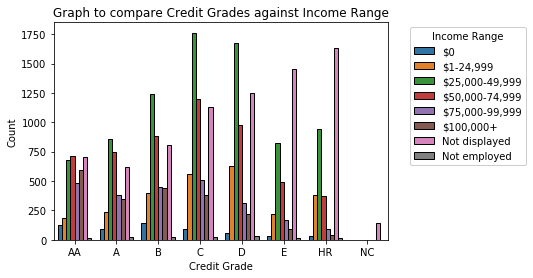

In [155]:
plt.rcParams["patch.force_edgecolor"] = True;
ax = sb.countplot(data = df, x = 'CreditGrade', hue = 'IncomeRange', order = CG)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 1, framealpha = 10, title = 'Income Range')
plt.xlabel('Credit Grade')
plt.ylabel('Count');
plt.title('Graph to compare Credit Grades against Income Range');

> The above bar chart shows a correlation between the higher Income Range and the higher credit grades. You can see looking at the AA rating that the there are considerably higher rate of $75,000+ earners. The is inversed when looking at Credit Grade E.

## Multivariate plots
Within this section we'll produce a number of plots aimed at exploring multiple variables simultaneously. This initial feeling
is that the data set is too large to effectively use encoding as a method of distinguishing differences between variables. instead we shall focus on facteing with violin plots and boxplots. Note that swarm plots were tried however ran very slowly considering the large volume of data being processed.


### Relationship between Lender Yield, Term and Loan Status
Within this section we will produce a series of box plots for each term. The box plots shall show the variance of Lender Yield for each Loan Status. 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Graphs to show Lender Yield vs Term vs Loan Status')

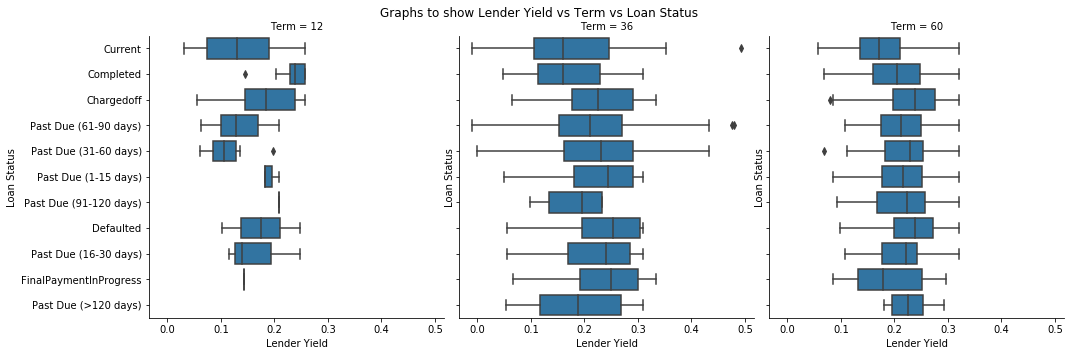

In [156]:
g= sb.FacetGrid(data = df, col = 'Term', size = 5)
g.map(sb.boxplot, 'LenderYield', 'LoanStatus')
g.set(xlabel='Lender Yield', ylabel='Loan Status')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Graphs to show Lender Yield vs Term vs Loan Status')

> The above plot shows that there is more consistency in lender yield for the longer Term loans implying that people are more successful at paying these back. Unsurprisingly the shorter length terms give a lower yield.

### Relationship between Income, Total Trades and Credit Grade
Within this section we'll use faceted box plots to review the difference between the above parameters.

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Graphs to show income and total trades against Credit Grade')

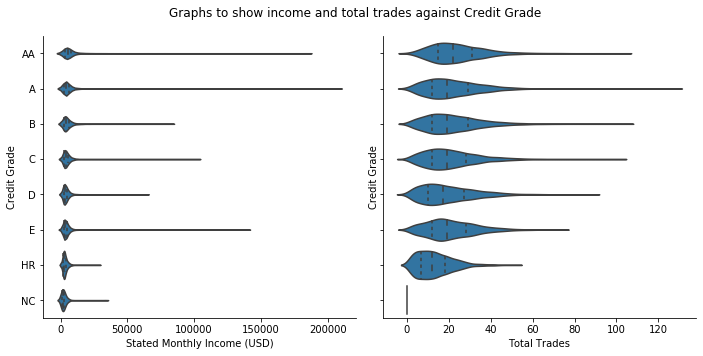

In [157]:
g = sb.PairGrid(data = df, x_vars = ['StatedMonthlyIncome', 'TotalTrades'],
                y_vars = ['CreditGrade'], size = 5)
g.map(sb.violinplot, inner = 'quartile', order = CG)
g.axes[0,0].xaxis.set_label_text('Stated Monthly Income (USD)')
g.axes[0,1].xaxis.set_label_text('Total Trades')
g.set(ylabel='Credit Grade')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Graphs to show income and total trades against Credit Grade')

> From the above graphs you can see that generally the higher someones credit rating the more trades they do. Similarly, although difficult to see given the extreme outliers, those with higher credit grades typically earn more than those with lower ratings. 

### Relationship between income, states and jobs
Let's look into the highest earning states & occupations, following the skewing of plots from the previous example I have removed the extreme outliers of those earning more than $20,000 per month in order to understand more about the wider population.

In [158]:
#complile state average incomes
df1 = df
df1 = df1[df1['StatedMonthlyIncome']<= 20000]
df1.head()
df1.shape

(112748, 81)

In [159]:
df1 = df1[['BorrowerState', 'StatedMonthlyIncome']]
df2 = df1.groupby(['BorrowerState']).mean()
df2 = df2.sort_values(['StatedMonthlyIncome'],ascending=False).head(10)
print(df2)
wealthieststates = list(df2.index)
wealthieststates

               StatedMonthlyIncome
BorrowerState                     
DC                     6592.219938
NJ                     6286.374890
MD                     6278.381668
VA                     6245.785483
CT                     6170.242854
TX                     5908.808560
MA                     5840.548888
CA                     5825.524155
NY                     5751.896791
AK                     5684.967172


['DC', 'NJ', 'MD', 'VA', 'CT', 'TX', 'MA', 'CA', 'NY', 'AK']

In [160]:
WStates = pd.api.types.CategoricalDtype(ordered = True, categories = wealthieststates)
df1['BorrowerState'] = df1['BorrowerState'].astype(WStates)

In [161]:
#Compile Occupation average incomes
df3 = df
df3 = df3[df3['StatedMonthlyIncome']<= 20000]
df3.head()
df3.shape

(112748, 81)

In [162]:
df3 = df3[['Occupation', 'StatedMonthlyIncome']]
df4 = df3.groupby(['Occupation']).mean()
df4 = df4.sort_values(['StatedMonthlyIncome'],ascending=False).head(10)
wealthiestjobs = list(df4.index)
wealthiestjobs

['Judge',
 'Doctor',
 'Pharmacist',
 'Attorney',
 'Executive',
 'Dentist',
 'Pilot - Private/Commercial',
 'Engineer - Chemical',
 'Principal',
 'Military Officer']

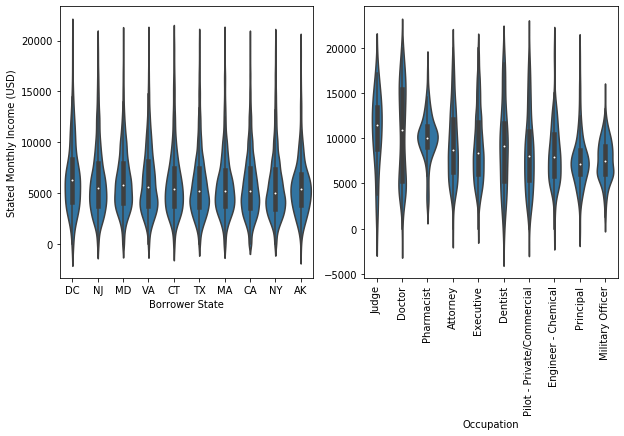

In [163]:
#Plot both charts side by side, note only top ten have been plotted
WJobs = pd.api.types.CategoricalDtype(ordered = True, categories = wealthiestjobs)
df3['Occupation'] = df3['Occupation'].astype(WJobs)
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.violinplot(data = df1, x = 'BorrowerState', y = 'StatedMonthlyIncome', color=base_color)
plt.xlabel('Borrower State')
plt.ylabel('Stated Monthly Income (USD)')

plt.subplot(1, 2, 2)
sb.violinplot(data = df3, x = 'Occupation', y = 'StatedMonthlyIncome', color=base_color)
plt.xticks(rotation = 90)
plt.ylabel('');


>From the above results we can see that when excluding those that earn over $20,000pm Washington DC comes out as the 'state' with the highest average earnings. When looking at occupations you can see that Judges and Doctors lead the way. There appears to be more variance in the wages of doctors in comparison to miltary officers for example.